In [54]:
# coding=utf-8
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
import mplfinance as mpf
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, mutual_info_regression, VarianceThreshold
from sklearn.linear_model import LinearRegression

import matplotlib
# %matplotlib

import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

matplotlib.rc('font', size=5)


class Weather:
    def __init__(self):
        self.df0 = pd.read_csv('./data/weatherHistory.csv')
        encoder = LabelEncoder()
        self.df = self.df0.copy(deep=True)
        self.df['Encoded Daily Summary'] = encoder.fit_transform(self.df['Daily Summary'].to_numpy())
        self.df = self.df.drop('Daily Summary', axis=1)
        self.df['Encoded Summary'] = encoder.fit_transform(self.df['Summary'].to_numpy())
        self.df = self.df.drop('Summary', axis=1)
        self.df['Encoded Precip Type'] = encoder.fit_transform(self.df['Precip Type'].to_numpy())
        self.df = self.df.drop('Precip Type', axis=1)
        dt = pd.to_datetime(self.df['Formatted Date'], utc=True)
        self.df = self.df.set_index(dt)
        self.df['year'] = self.df.index.year
        self.df['month'] = self.df.index.month
        self.df['day'] = self.df.index.day
        self.df['hour'] = self.df.index.hour
        self.df['minute'] = self.df.index.minute

    def exploratory(self):
        cols = self.df0.columns
        for i, col in enumerate(['Encoded Daily Summary']):
            print(self.df.groupby(col).count().sort_values('Formatted Date', ascending=False).head(20)[
                      ['Formatted Date']])
            print()

    def correlation_analysis(self, df):
        corr = df.corr()
        f, ax = plt.subplots(figsize=(20, 20))
        sns.set(font_scale=1.4)
        cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
        sns.heatmap(df.corr(), annot=True, ax=ax, cbar_kws={"orientation": "horizontal"},
                    annot_kws={"size": 16})  # , linewidths=.5, fmt='.1f')
        pass

    def mic(self, X, y):
        mi_score = MIC(X, y)
        print("mi_score: ", mi_score)
        return mi_score

    # Correlation Analysis
    def feature_importance(self):
        X = self.dfx.drop(['diagnosis'], axis=1)
        y = self.dfx.diagnosis

        clf = RandomForestClassifier(n_estimators=50)
        model = clf.fit(X, y)

        feat_importances = pd.DataFrame(model.feature_importances_, index=x.columns, columns=["Importance"])
        feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
        feat_importances.plot(kind='bar')


if __name__ == '__main__':
    foo = Weather()


# remove high relative feature 'Apparent Temperature (C)'

Index(['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Encoded Daily Summary', 'Encoded Summary', 'Encoded Precip Type', 'year', 'month', 'day', 'hour', 'minute'], dtype='object')


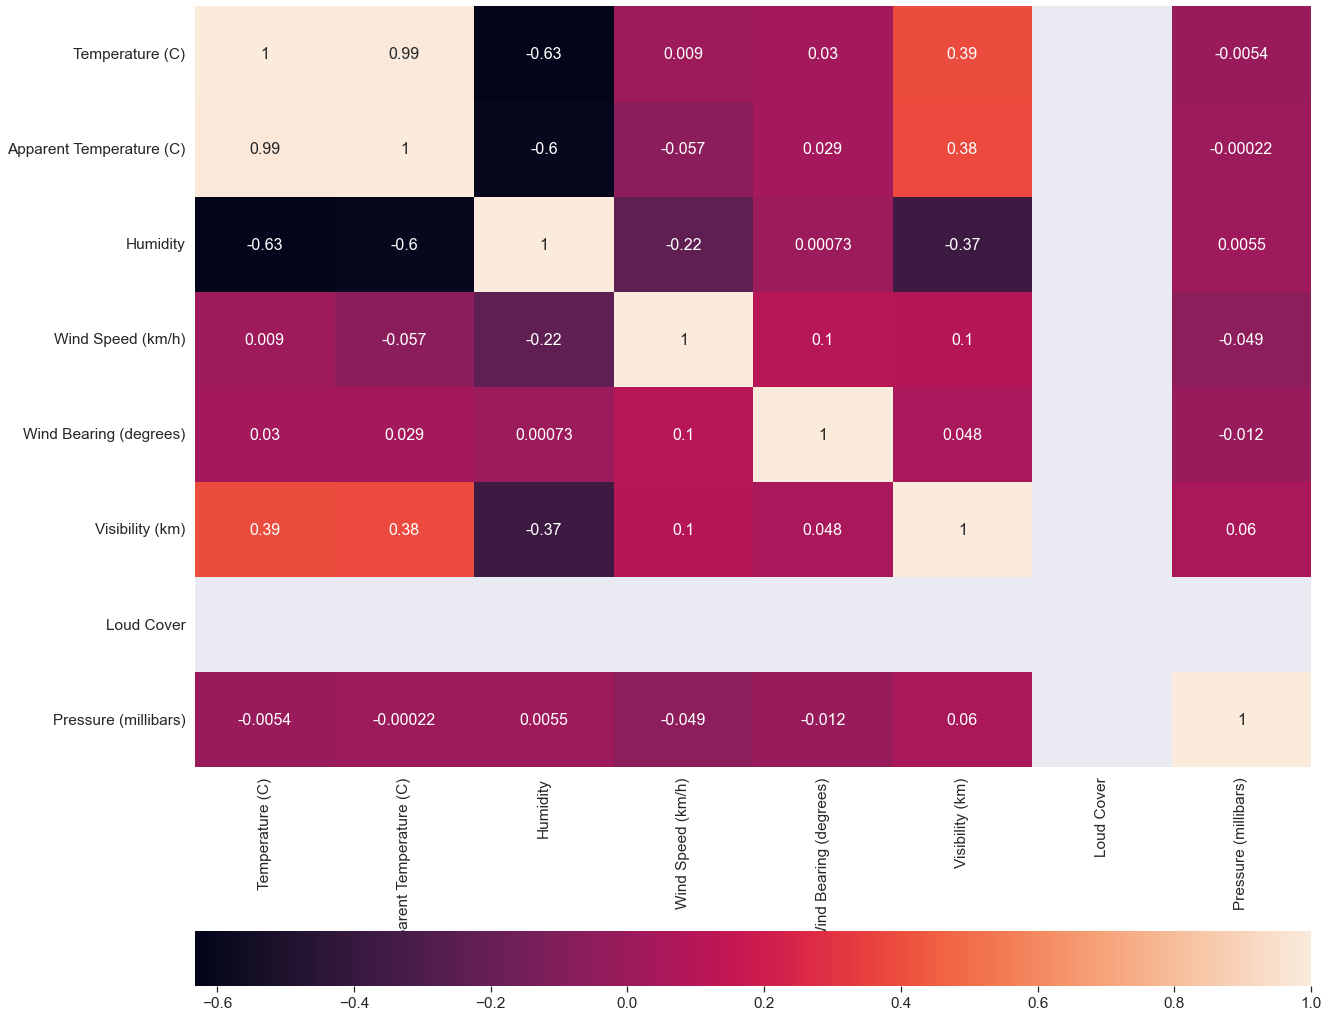

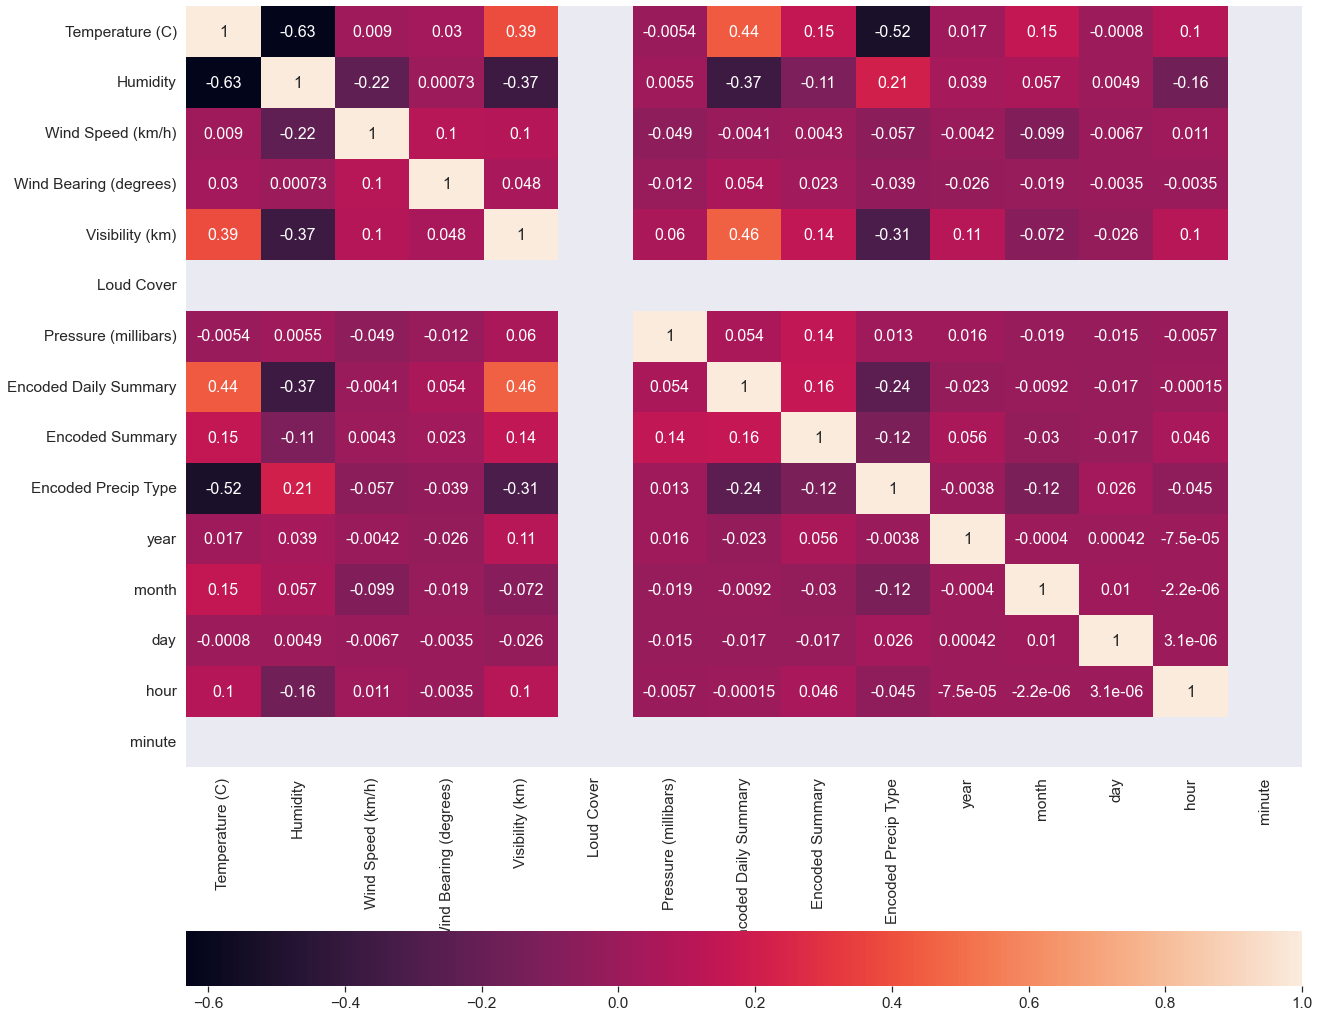

In [55]:
foo.correlation_analysis(foo.df0)
print(foo.df.columns)
df = foo.df.drop(['Apparent Temperature (C)'],axis=1)
df.head()
foo.correlation_analysis(df)

# apply Variance Threshold unsupervised

In [56]:
selector = VarianceThreshold()
dfx = foo.df.drop(['Formatted Date'], axis=1)
selector.fit(dfx)
print("%25s\t%10s" % ('colume', 'variances'))
for i, col in enumerate(dfx.columns):
    print("%25s\t%10s" % (col, "%.3f" % selector.variances_[i]))

                   colume	 variances
          Temperature (C)	    61.728
 Apparent Temperature (C)	    67.061
                 Humidity	     0.038
        Wind Speed (km/h)	    47.797
   Wind Bearing (degrees)	   359.000
          Visibility (km)	    16.100
               Loud Cover	     0.000
     Pressure (millibars)	  1046.380
    Encoded Daily Summary	   213.000
          Encoded Summary	    19.022
      Encoded Precip Type	     0.118
                     year	     9.999
                    month	    11.000
                      day	    30.000
                     hour	    23.000
                   minute	     0.000


# apply Mutual Information on discrete variable

In [50]:
dfx = foo.df.drop(['Formatted Date', 'Encoded Daily Summary'], axis=1)
dfy = foo.df['Encoded Daily Summary']
X = dfx.to_numpy()
y = dfy.to_numpy()
mi_score = mutual_info_classif(X, y)
print("%25s\t%25s" % ('colume', 'mutual information score'))
for i, col in enumerate(dfx.columns):
    print("%25s\t%25s" % (col, "%.3f" % mi_score[i]))

                   colume	 mutual information score
          Temperature (C)	                    0.348
 Apparent Temperature (C)	                    0.317
                 Humidity	                    0.226
        Wind Speed (km/h)	                    0.136
   Wind Bearing (degrees)	                    0.123
          Visibility (km)	                    0.381
               Loud Cover	                    0.001
     Pressure (millibars)	                    0.282
          Encoded Summary	                    0.507
      Encoded Precip Type	                    0.080
                     year	                    0.240
                    month	                    0.398
                      day	                    0.343
                     hour	                    0.000
                   minute	                    0.001


<AxesSubplot:>

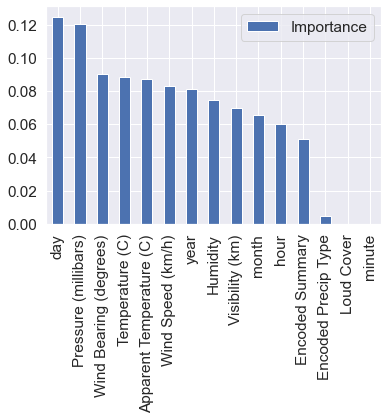

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier( n_estimators=50)
    
model = clf.fit(X,y)
feat_importances = pd.DataFrame(model.feature_importances_, index=dfx.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')

In [53]:
y


array([197, 197, 197, ..., 170, 170, 170])

In [52]:
grid_search_cv = GridSearchCV(LinearRegression(), {'C':[0.001,0.01,0.1,1,10]}, cv=5)
grid_search_cv.fit(X, y)


ValueError: Invalid parameter 'C' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'].

# apply Mutual Information on continuous variable

In [36]:
dfx = foo.df.drop(['Formatted Date', 'Temperature (C)'], axis=1)
dfy = foo.df['Temperature (C)']
X = dfx.to_numpy()
y = dfy.to_numpy()
mi_score = mutual_info_regression(X, y)
print("%25s\t%25s" % ('colume', 'mutual information score'))
for i, col in enumerate(dfx.columns):
    print("%25s\t%25s" % (col, "%.3f" % mi_score[i]))

                   colume	 mutual information score
 Apparent Temperature (C)	                    5.753
                 Humidity	                    0.649
        Wind Speed (km/h)	                    0.207
   Wind Bearing (degrees)	                    0.098
          Visibility (km)	                    0.435
               Loud Cover	                    0.000
     Pressure (millibars)	                    0.217
    Encoded Daily Summary	                    0.329
          Encoded Summary	                    0.162
      Encoded Precip Type	                    0.353
